In [ ]:
!pip install transformers -q
!pip install datasets -q
!pip install evaluate -q
!pip cache purge -q

!pip install torch==2.5.1 torchvision==0.20.1+cu124 -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.6 MB/s eta 0:00:00
ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.15.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.20.1+cu124 (from versions: 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1, 0.21.0, 0.22.0)
ERROR: No matching distribution found for torchvision==0.20.1+cu124


# Libraries

In [ ]:
import pandas as pd
from datasets import Dataset
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Dataset Loading, Preprocessing, and Splitting

In [ ]:
df = pd.read_csv('dataset.csv', encoding='ISO-8859-1', header=None)
df.columns = ['sentiment', 'text']
df.dropna(inplace=True)

print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['sentiment'].value_counts())


Shape: (10688, 2)

Missing values:
 sentiment    0
text         0
dtype: int64

Class distribution:
 sentiment
neutral     6009
positive    3215
negative    1464
Name: count, dtype: int64


# Data Cleaning

In [ ]:
import pandas as pd
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # remove brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove links
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)  # remove punctuation
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)  # remove words with numbers
    return text

df["clean_text"] = df["text"].apply(clean_text)


# Data Labeling

In [ ]:
from sklearn.model_selection import train_test_split

label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df["label"] = df["sentiment"].map(label_map)

X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["label"], test_size=0.2, random_state=42)


# Convert text to TF-IDF features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Logistic Regression

Logistic Regression
Training Accuracy: 0.8563742690058479
Testing Accuracy : 0.7605238540692236
              precision    recall  f1-score   support

           0       0.57      0.38      0.45       308
           1       0.77      0.88      0.82      1200
           2       0.82      0.72      0.77       630

    accuracy                           0.76      2138
   macro avg       0.72      0.66      0.68      2138
weighted avg       0.75      0.76      0.75      2138



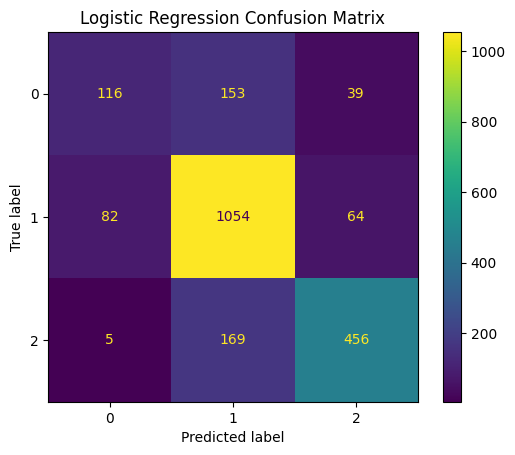

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)

y_pred_lr = lr.predict(X_test_vec)
print("Logistic Regression")
print("Training Accuracy:", lr.score(X_train_vec, y_train))
print("Testing Accuracy :", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


# Naive Bayes

Naive Bayes
Training Accuracy: 0.7842105263157895
Testing Accuracy : 0.7118802619270346
              precision    recall  f1-score   support

           0       0.59      0.18      0.27       308
           1       0.71      0.92      0.80      1200
           2       0.73      0.58      0.64       630

    accuracy                           0.71      2138
   macro avg       0.68      0.56      0.57      2138
weighted avg       0.70      0.71      0.68      2138



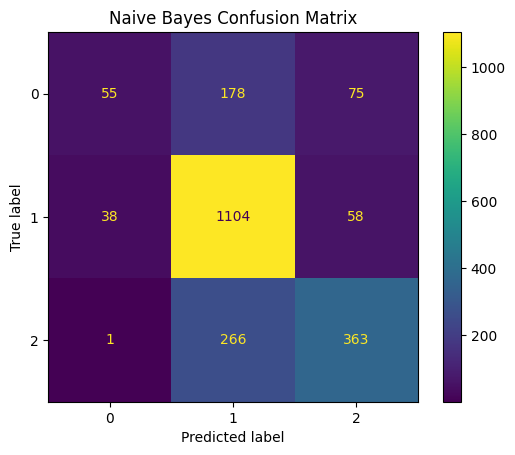

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

y_pred_nb = nb.predict(X_test_vec)
print("Naive Bayes")
print("Training Accuracy:", nb.score(X_train_vec, y_train))
print("Testing Accuracy :", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.title("Naive Bayes Confusion Matrix")
plt.show()


# Support Vector Machine(SVM)

SVM
Training Accuracy: 0.9300584795321637
Testing Accuracy : 0.8021515434985969
              precision    recall  f1-score   support

           0       0.57      0.50      0.53       308
           1       0.83      0.85      0.84      1200
           2       0.84      0.85      0.85       630

    accuracy                           0.80      2138
   macro avg       0.75      0.73      0.74      2138
weighted avg       0.80      0.80      0.80      2138



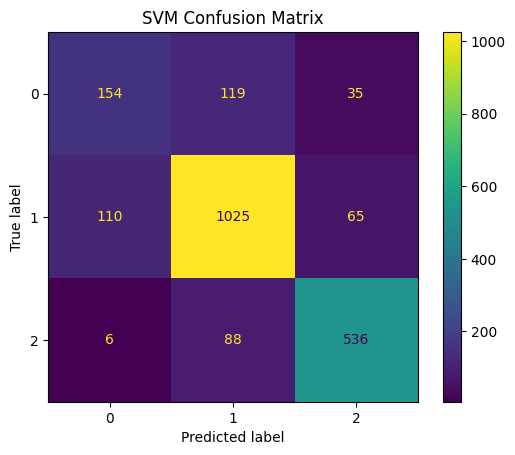

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_vec, y_train)

y_pred_svm = svm.predict(X_test_vec)
print("SVM")
print("Training Accuracy:", svm.score(X_train_vec, y_train))
print("Testing Accuracy :", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.title("SVM Confusion Matrix")
plt.show()


# Random Forest

Random Forest
Training Accuracy: 0.9535672514619883
Testing Accuracy : 0.7871842843779233
              precision    recall  f1-score   support

           0       0.50      0.36      0.42       308
           1       0.79      0.89      0.83      1200
           2       0.89      0.81      0.85       630

    accuracy                           0.79      2138
   macro avg       0.73      0.68      0.70      2138
weighted avg       0.78      0.79      0.78      2138



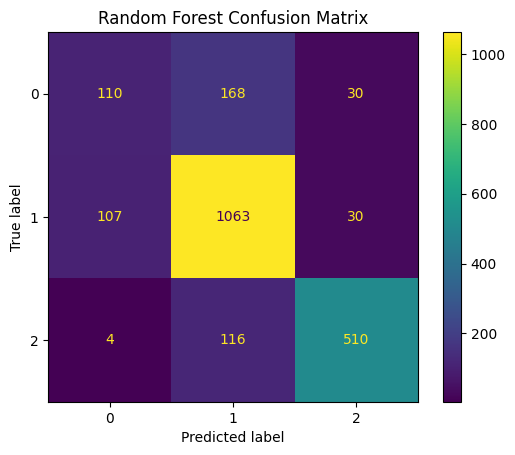

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_vec, y_train)

y_pred_rf = rf.predict(X_test_vec)
print("Random Forest")
print("Training Accuracy:", rf.score(X_train_vec, y_train))
print("Testing Accuracy :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest Confusion Matrix")
plt.show()


# Comparison Graph

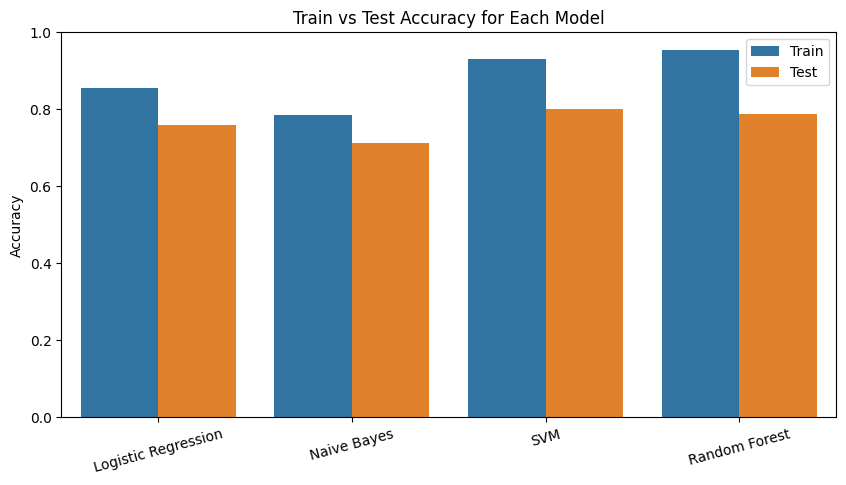

In [ ]:
import seaborn as sns

model_names = ["Logistic Regression", "Naive Bayes", "SVM", "Random Forest"]
train_acc = [
    lr.score(X_train_vec, y_train),
    nb.score(X_train_vec, y_train),
    svm.score(X_train_vec, y_train),
    rf.score(X_train_vec, y_train)
]
test_acc = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf)
]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names*2, y=train_acc + test_acc, hue=["Train"]*4 + ["Test"]*4)
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy for Each Model")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.show()


# Tokenization of Dataset Using FinBERT Tokenizer

In [ ]:
label2id = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['sentiment'].map(label2id)

# Hugging Face Dataset
hf_dataset = Dataset.from_pandas(df[['text', 'label']])
hf_dataset = hf_dataset.train_test_split(test_size=0.2)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = hf_dataset.map(tokenize_function, batched=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

Map:   0%|          | 0/8550 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/2138 [00:00<?, ? examples/s]

# Loading the FinBERT Model for Sequence Classification

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(
    "yiyanghkust/finbert-tone",
    num_labels=3,
    id2label={0: "negative", 1: "neutral", 2: "positive"},
    label2id={"negative": 0, "neutral": 1, "positive": 2}
)

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

# Setting Up Training Arguments for Fine-Tuning

In [ ]:
training_args = TrainingArguments(
    output_dir="./finbert-finetuned",
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    report_to="none"
)

# Initializing the Trainer for Model Fine-Tuning

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer
)

<ipython-input-18-eca663cc33b8>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [ ]:
trainer.train()

Step,Training Loss
500,0.698300
1000,0.307700
1500,0.205900
2000,0.168900
2500,0.143300
3000,0.128600
3500,0.123200
4000,0.120500
4500,0.109300
5000,0.103100


TrainOutput(global_step=5350, training_loss=0.20399004356883396, metrics={'train_runtime': 1156.3978, 'train_samples_per_second': 73.936, 'train_steps_per_second': 4.626, 'total_flos': 2554961815060956.0, 'train_loss': 0.20399004356883396, 'epoch': 10.0})

# Evaluating the Model and Generating Predictions


In [ ]:
results = trainer.evaluate()
print("Evaluation results:")
for key, value in results.items():
    print(f"{key}: {value}")

# calculating predictions on test set
predictions = trainer.predict(tokenized_datasets["test"])
preds = predictions.predictions.argmax(-1)

print("Classification report on Test data")
print(classification_report(tokenized_datasets["test"]["label"], preds,
                            target_names=["negative", "neutral", "positive"]))


Evaluation results:
eval_loss: 0.6392695307731628
eval_runtime: 7.1514
eval_samples_per_second: 298.962
eval_steps_per_second: 18.738
epoch: 10.0
Classification report on Test data
              precision    recall  f1-score   support

    negative       0.65      0.83      0.73       287
     neutral       0.95      0.87      0.90      1196
    positive       0.91      0.94      0.92       655

    accuracy                           0.88      2138
   macro avg       0.83      0.88      0.85      2138
weighted avg       0.89      0.88      0.89      2138



# Saving the Fine-Tuned Model and Tokenizer

In [ ]:
trainer.save_model("./my-finbert-finetuned")
tokenizer.save_pretrained("./my-finbert-finetuned")


('./my-finbert-finetuned/tokenizer_config.json',
 './my-finbert-finetuned/special_tokens_map.json',
 './my-finbert-finetuned/vocab.txt',
 './my-finbert-finetuned/added_tokens.json',
 './my-finbert-finetuned/tokenizer.json')

# Manual testing for News headline


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("./my-finbert-finetuned")
tokenizer = AutoTokenizer.from_pretrained("./my-finbert-finetuned")


In [ ]:
finbert_custom = pipeline("text-classification", model="./my-finbert-finetuned", tokenizer=tokenizer)
finbert_custom("The company's quarterly loss exceeded expectations, driving the stock price higher.")

Device set to use cuda:0


[{'label': 'positive', 'score': 0.9999963045120239}]

# Confusion Matrix for Model Evaluation

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


<Figure size 600x500 with 0 Axes>

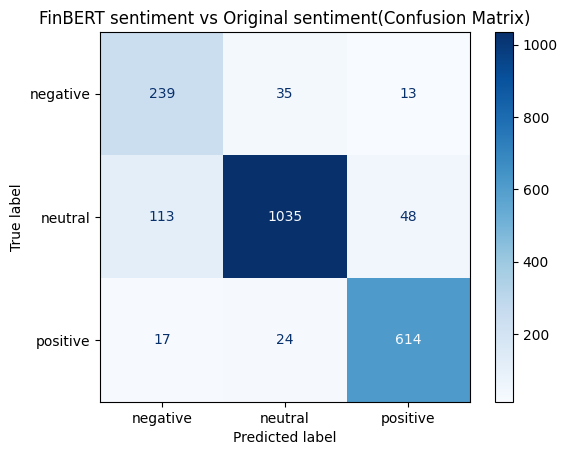

In [ ]:
finbert_custom = pipeline(
    "text-classification",
    model="./my-finbert-finetuned",
    tokenizer=tokenizer,
    device=0
)

test_df = tokenized_datasets["test"].to_pandas()
def get_custom_sentiment(text):
    try:
        result = finbert_custom(text[:512])
        return result[0]["label"].lower()
    except:
        return "neutral"

test_df["finbert_sentiment"] = test_df["text"].apply(get_custom_sentiment)

label_map = {"negative": 0, "neutral": 1, "positive": 2}
y_true = test_df["label"]
y_pred = test_df["finbert_sentiment"].map(label_map)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["negative", "neutral", "positive"])

plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format="d")
plt.title("FinBERT sentiment vs Original sentiment(Confusion Matrix)")
plt.grid(False)
plt.show()


# To download Fine-tuned model on local pc

In [ ]:
!zip -r my-finbert-finetuned.zip ./my-finbert-finetuned
